In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
test = pd.read_csv('titanic_test.csv')

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<Axes: >

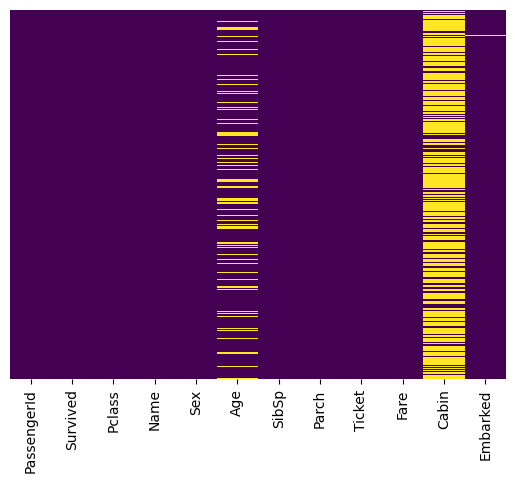

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

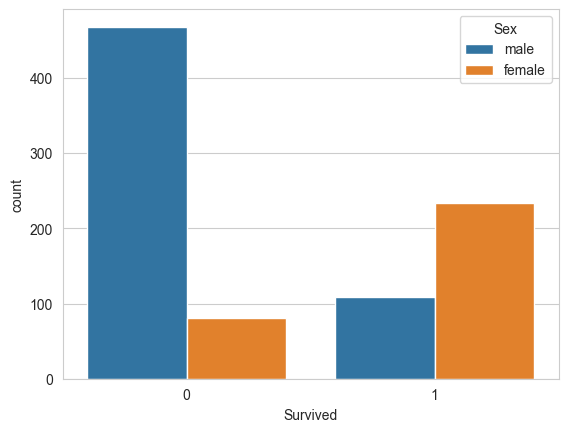

In [7]:
sns.countplot(data = train,x='Survived',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

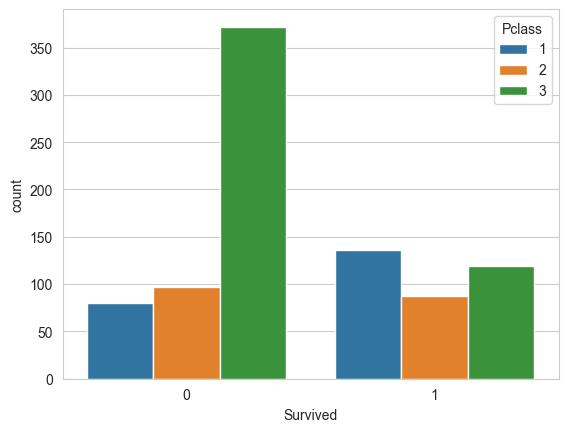

In [8]:
sns.countplot(data = train,x='Survived',hue='Pclass')

<Axes: xlabel='Age', ylabel='Count'>

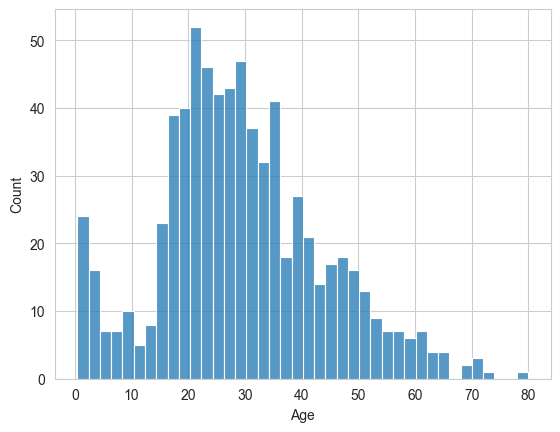

In [10]:
sns.histplot(train['Age'].dropna(),bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

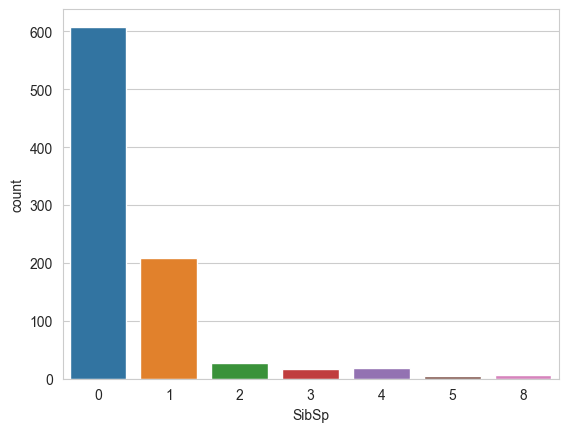

In [11]:
sns.countplot(data = train,x='SibSp')

<Axes: >

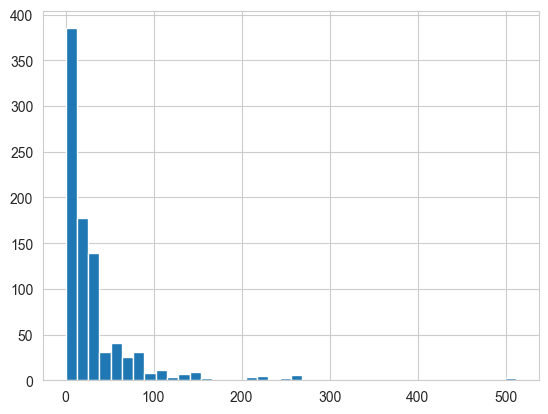

In [12]:
train['Fare'].hist(bins=40)

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
train['Fare'].iplot(kind='hist',bins=40)

<Axes: xlabel='Pclass', ylabel='Age'>

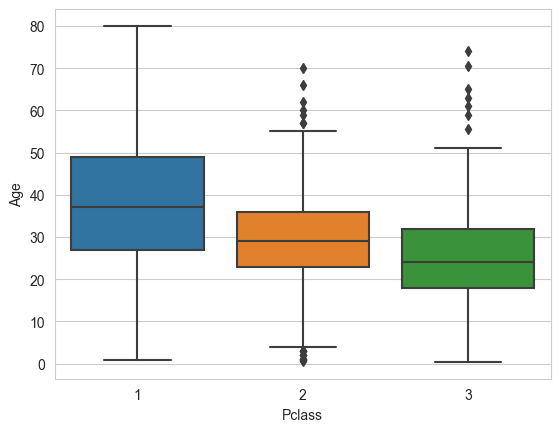

In [15]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

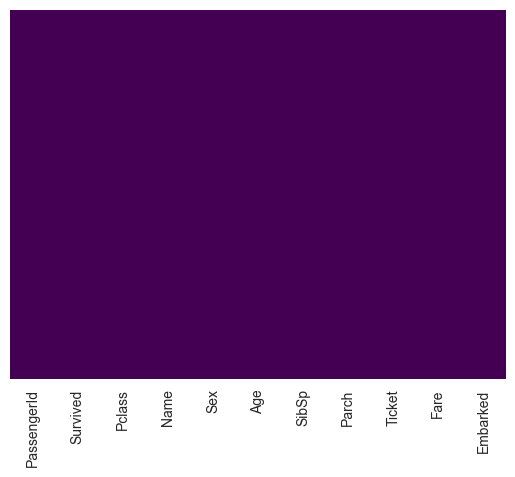

In [28]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [25]:
train.drop('Cabin',axis=1,inplace=True)

In [26]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [27]:
train.dropna(inplace=True)

In [31]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [35]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [36]:
train = pd.concat([train,sex,embark],axis=1)

In [37]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False


In [38]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace=True)

In [39]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False


In [40]:
train.drop('PassengerId',axis = 1,inplace = True)

In [41]:
train.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True


In [45]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [43]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression(max_iter=1000)

In [52]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
predictions = logmodel.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

